In [48]:
import psycopg2
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Vitals

## Temperature

In [4]:
chartevents_temp_df = pd.read_csv('chartevents_temp.csv')


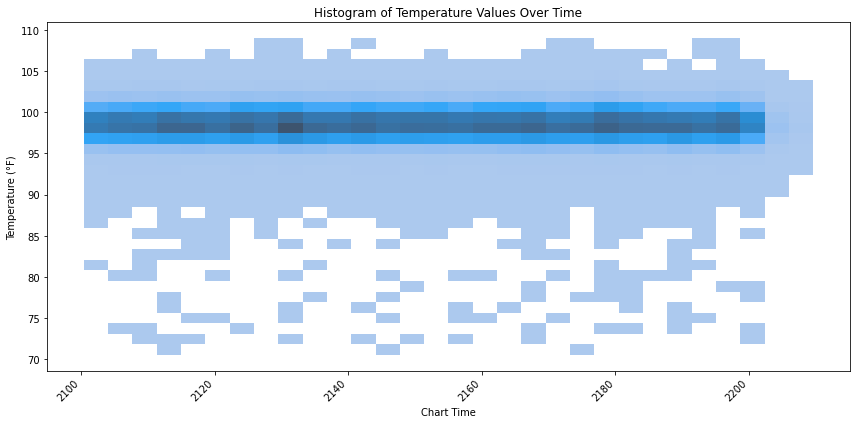

In [6]:
# Convert 'charttime' to datetime format
chartevents_temp_df['charttime'] = pd.to_datetime(chartevents_temp_df['charttime'])
chartevents_temp_df = chartevents_temp_df[(chartevents_temp_df['Final_Temperature_F'] > 70) & (chartevents_temp_df['Final_Temperature_F'] < 110)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the histogram
sns.histplot(x='charttime', y='Final_Temperature_F', data=chartevents_temp_df, kde=True, bins=30)

# Customize plot labels and title
plt.title('Histogram of Temperature Values Over Time')
plt.xlabel('Chart Time')
plt.ylabel('Temperature (°F)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
subgroup_1_df = pd.read_csv('subgroup_1.csv')
subgroup_2_df = pd.read_csv('subgroup_2.csv')
subgroup_3_df = pd.read_csv('subgroup_3.csv')
subgroup_4_df = pd.read_csv('subgroup_4.csv')
subgroup_5_df = pd.read_csv('subgroup_5.csv')
subgroup_6_df = pd.read_csv('subgroup_6.csv')
subgroup_7_df = pd.read_csv('subgroup_7.csv')

In [9]:
def merge_temperature_for_subgroup(chartevents_temp_df, subgroup_df, subgroup_number):
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    merged_df = pd.merge(chartevents_temp_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Final_Temperature_F']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='inner')

    return merged_df

In [10]:
subgroup_1_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_1_df, 1)
subgroup_2_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_2_df, 2)
subgroup_3_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_3_df, 3)
subgroup_4_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_4_df, 4)
subgroup_5_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_5_df, 5)
subgroup_6_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_6_df, 6)
subgroup_7_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_7_df, 7)


In [11]:
filter_condition = (subgroup_1_temp_df['Final_Temperature_F'] > 70) & (subgroup_1_temp_df['Final_Temperature_F'] < 110)
subgroup_1_temp_df = subgroup_1_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_2_temp_df['Final_Temperature_F'] > 70) & (subgroup_2_temp_df['Final_Temperature_F'] < 110)
subgroup_2_temp_df = subgroup_2_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_3_temp_df['Final_Temperature_F'] > 70) & (subgroup_3_temp_df['Final_Temperature_F'] < 110)
subgroup_3_temp_df = subgroup_3_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_4_temp_df['Final_Temperature_F'] > 70) & (subgroup_4_temp_df['Final_Temperature_F'] < 110)
subgroup_4_temp_df = subgroup_4_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_5_temp_df['Final_Temperature_F'] > 70) & (subgroup_5_temp_df['Final_Temperature_F'] < 110)
subgroup_5_temp_df = subgroup_5_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_6_temp_df['Final_Temperature_F'] > 70) & (subgroup_6_temp_df['Final_Temperature_F'] < 110)
subgroup_6_temp_df = subgroup_6_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_7_temp_df['Final_Temperature_F'] > 70) & (subgroup_7_temp_df['Final_Temperature_F'] < 110)
subgroup_7_temp_df = subgroup_7_temp_df[filter_condition].reset_index(drop=True)


In [12]:


original_stats = chartevents_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_1_stats = subgroup_1_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_2_stats = subgroup_2_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_3_stats = subgroup_3_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_4_stats = subgroup_4_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_5_stats = subgroup_5_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_6_stats = subgroup_6_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_7_stats = subgroup_7_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

result_df = pd.DataFrame({
    'Statistic': ['mean', 'max', 'mode', 'std', 'median'],
    'Original Chartevents': original_stats.values,
    'Subgroup 1': subgroup_1_stats.values,
    'Subgroup 2': subgroup_2_stats.values,
    'Subgroup 3': subgroup_3_stats.values,
    'Subgroup 4': subgroup_4_stats.values,
    'Subgroup 5': subgroup_5_stats.values,
    'Subgroup 6': subgroup_6_stats.values,
    'Subgroup 7': subgroup_7_stats.values
})

result_df.set_index('Statistic', inplace=True)

result_df


,Original Chartevents,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7
Statistic,,,,,,,,
mean,98.612467,98.381712,98.289350,98.404344,98.698643,98.909630,98.559659,98.270449
max,109.000043,107.000057,109.000043,107.900057,109.000043,108.139999,109.000043,106.900002
mode,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000
std,1.520419,1.450650,1.435112,1.508261,1.449904,1.555369,1.507753,1.401591
median,98.600000,98.300003,98.239999,98.300003,98.700079,98.800003,98.500000,98.200043


/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_88121/3053405559.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  all_subgroups_df = pd.concat([subgroup_1_temp_df, subgroup_2_temp_df, subgroup_3_temp_df,


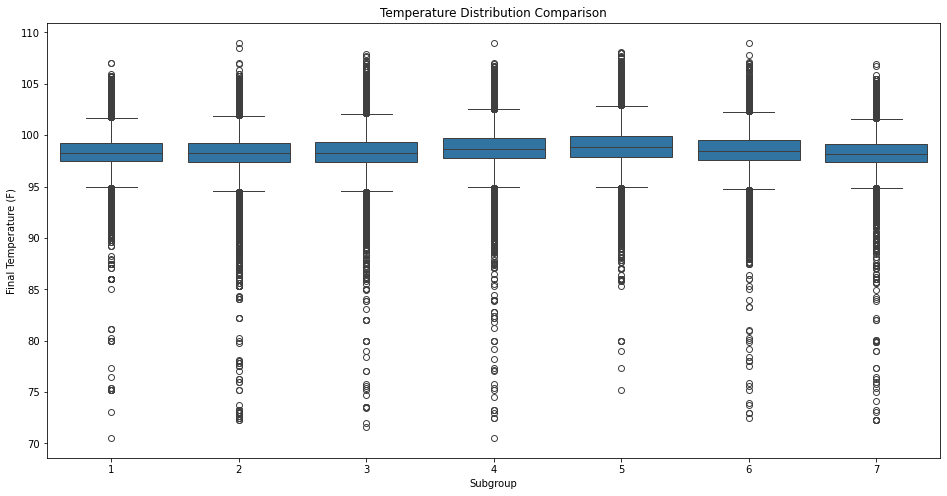

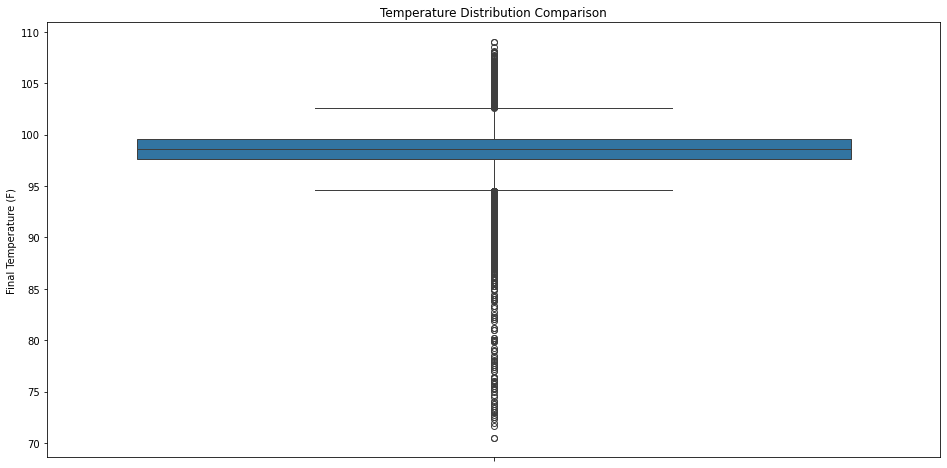

In [16]:
all_subgroups_df = pd.concat([subgroup_1_temp_df, subgroup_2_temp_df, subgroup_3_temp_df, 
                                subgroup_4_temp_df, subgroup_5_temp_df, subgroup_6_temp_df, 
                                subgroup_7_temp_df], keys=['Subgroup 1', 'Subgroup 2', 'Subgroup 3', 'Subgroup 4', 'Subgroup 5', 'Subgroup 6', 'Subgroup 7', 'Original'])

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=all_subgroups_df, x='subgroup', y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.xlabel('Subgroup')
plt.ylabel('Final Temperature (F)')
plt.show()

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=chartevents_temp_df, y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.ylabel('Final Temperature (F)')
plt.show()

## Respiratory Rate

In [2]:
chartevents_rr_df = pd.read_csv('chartevents_rr.csv')

In [19]:
chartevents_rr_df['RespiratoryRate_combined'].describe()



count    6.263265e+06
mean     2.039807e+01
std      9.412437e+02
min      0.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      2.355555e+06
Name: RespiratoryRate_combined, dtype: float64

In [3]:
#Fixing negative
index_to_replace = chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] < 0].index[0]
chartevents_rr_df.loc[index_to_replace, 'RespiratoryRate_combined'] = chartevents_rr_df.loc[index_to_replace, 'Respiratory Rate (spontaneous)']

In [22]:
#Finding best value replacement for outlier values 
column_name = 'RespiratoryRate_combined'


Q1 = chartevents_rr_df[column_name].quantile(0.25)
Q3 = chartevents_rr_df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = chartevents_rr_df[(chartevents_rr_df[column_name] < lower_bound) | (chartevents_rr_df[column_name] > upper_bound)]

def get_best_respiratory_rate(row):
    candidate_columns = ['Respiratory Rate', 'Respiratory Rate (Set)', 'Respiratory Rate (Total)']

    best_value = None
    min_difference = float('inf')

    for column in candidate_columns:
        value = row[column]
        if not pd.isnull(value) and 12 <= value <= 22:
            return value
        elif not pd.isnull(value):
            difference = abs(value - 17)  # 17 is the midpoint of the decent human respiratory rate range
            if difference < min_difference:
                min_difference = difference
                best_value = value

    return best_value

outliers['RespiratoryRate_combined'] = outliers.apply(get_best_respiratory_rate, axis=1)

/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_15504/445750811.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['RespiratoryRate_combined'] = outliers.apply(get_best_respiratory_rate, axis=1)


In [24]:
#Fixing error values leftover 
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 100000


In [25]:
outliers['RespiratoryRate_combined'].describe()

count    103441.000000
mean         29.390770
std          18.495647
min           0.000000
25%           2.000000
50%          38.000000
75%          41.000000
max          90.000000
Name: RespiratoryRate_combined, dtype: float64

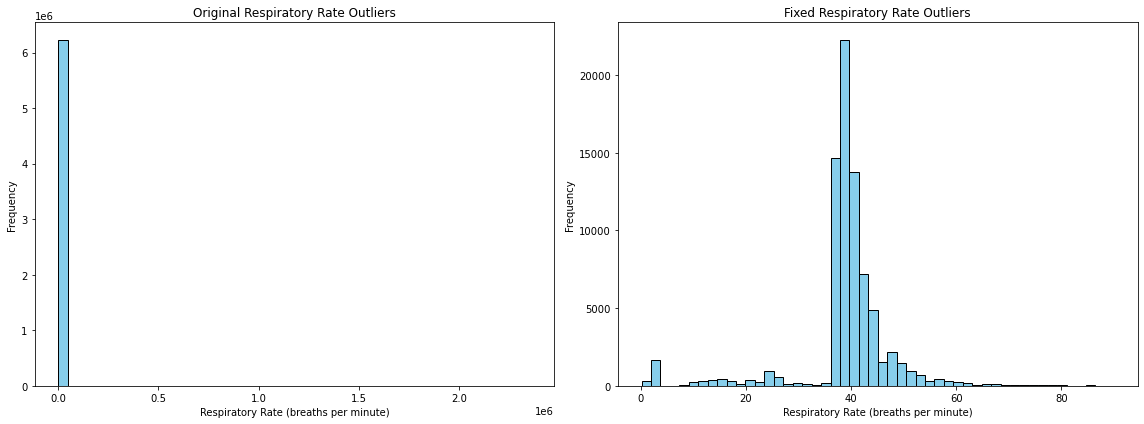

In [26]:
#Visualize outliers before and after
respiratory_rate_column = chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] > 0]['RespiratoryRate_combined'].dropna()
respiratory_rate_column_fixed = outliers[outliers['RespiratoryRate_combined'] > 0]['RespiratoryRate_combined'].dropna()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(respiratory_rate_column, bins=50, color='skyblue', edgecolor='black')
plt.title('Original Respiratory Rate Outliers')
plt.xlabel('Respiratory Rate (breaths per minute)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(respiratory_rate_column_fixed, bins=50, color='skyblue', edgecolor='black')
plt.title('Fixed Respiratory Rate Outliers')
plt.xlabel('Respiratory Rate (breaths per minute)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [36]:
outliers.set_index(['subject_id', 'hadm_id', 'charttime'], inplace=True)
chartevents_rr_df.set_index(['subject_id', 'hadm_id', 'charttime'], inplace=True)

chartevents_rr_df.update(outliers[['RespiratoryRate_combined']])

chartevents_rr_df.reset_index(inplace=True)

KeyError: "None of ['subject_id', 'hadm_id', 'charttime'] are in the columns"

In [31]:
chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] > 90]

,subject_id,hadm_id,charttime,icustay_id,Respiratory Rate,Respiratory Rate (Set),Respiratory Rate (Total),Respiratory Rate (spontaneous),Respiratory Rate Set,RespiratoryRate_combined
100846,801,187764,2197-07-05 19:30:00,283491.0,NaN,NaN,NaN,NaN,120.0,120.0
563720,4785,139435,2199-02-12 20:50:00,262938.0,NaN,NaN,NaN,NaN,123.0,123.0
968957,8132,106508,2177-11-13 06:15:00,247952.0,NaN,NaN,NaN,NaN,110.0,110.0
2504980,21187,118827,2107-10-08 23:02:00,289919.0,NaN,NaN,NaN,NaN,100.0,100.0
2504981,21187,118827,2107-10-09 03:02:00,289919.0,NaN,NaN,NaN,NaN,130.0,130.0
3416498,28801,144188,2173-02-21 16:05:00,288412.0,NaN,NaN,NaN,2423.0,NaN,2423.0
3614537,30509,161350,2113-07-25 13:12:00,251795.0,NaN,NaN,NaN,189.0,NaN,189.0
4463073,54247,171612,2121-07-07 09:00:00,217082.0,NaN,NaN,NaN,315.0,NaN,315.0
4620725,57333,134115,2178-10-13 10:00:00,272679.0,NaN,NaN,NaN,650.0,NaN,650.0
5239414,73611,138998,2183-01-01 08:09:00,215592.0,NaN,NaN,NaN,430.0,NaN,430.0


In [37]:
chartevents_rr_df.loc[chartevents_rr_df['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
chartevents_rr_df.loc[chartevents_rr_df['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10


In [38]:
chartevents_rr_df['RespiratoryRate_combined'].describe()

count    6.263265e+06
mean     2.001401e+01
std      6.209322e+00
min      0.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      9.000000e+01
Name: RespiratoryRate_combined, dtype: float64

In [39]:
def merge_respiratory_to_subgroup(respiratory_df, subgroup_df):
    respiratory_df['charttime'] = pd.to_datetime(respiratory_df['charttime'])
    
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    filtered_respiratory_df = respiratory_df[respiratory_df['subject_id'].isin(subgroup_df['subject_id'])]

    merged_df = pd.merge(filtered_respiratory_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'RespiratoryRate_combined']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='outer')

    return merged_df

In [42]:
subgroup_1_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_1_df)
subgroup_2_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_2_df)
subgroup_3_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_3_df)
subgroup_4_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_4_df)
subgroup_5_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_5_df)
subgroup_6_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_6_df)
subgroup_7_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_7_df)


In [392]:
subgroup_1_rr_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'charttime',
       'RespiratoryRate_combined', 'rounded_age', 'admission_type_encoded',
       'subgroup'],
      dtype='object')

In [393]:
chartevents_rr_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Respiratory Rate',
       'Respiratory Rate (Set)', 'Respiratory Rate (Total)',
       'Respiratory Rate (spontaneous)', 'Respiratory Rate Set',
       'RespiratoryRate_combined'],
      dtype='object')

In [43]:

resp_dfs = [subgroup_1_rr_df,
            subgroup_2_rr_df,
            subgroup_3_rr_df,
            subgroup_4_rr_df,
            subgroup_5_rr_df,
            subgroup_6_rr_df,
            subgroup_7_rr_df]


def calculate_stats(df):
    return df['RespiratoryRate_combined'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

resp_stats_list = []

for i, df in enumerate(resp_dfs):
    subgroup_stats = calculate_stats(df)
    resp_stats_list.append(subgroup_stats)

result_resp_df = pd.DataFrame(resp_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(resp_dfs))])

result_resp_df.loc['Original Chartevents'] = calculate_stats(chartevents_rr_df)

result_resp_df = result_resp_df.transpose()

result_resp_df


,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,18.813223,20.478872,19.975470,19.766283,19.548740,20.292950,20.245975,20.014015
max,88.000000,90.000000,90.000000,90.000000,89.000000,90.000000,90.000000,90.000000
mode,16.000000,20.000000,18.000000,18.000000,16.000000,20.000000,20.000000,18.000000
std,5.854500,6.047675,6.309844,6.187333,6.462246,6.448525,5.936969,6.209322
median,18.000000,20.000000,19.000000,19.000000,19.000000,20.000000,20.000000,19.000000


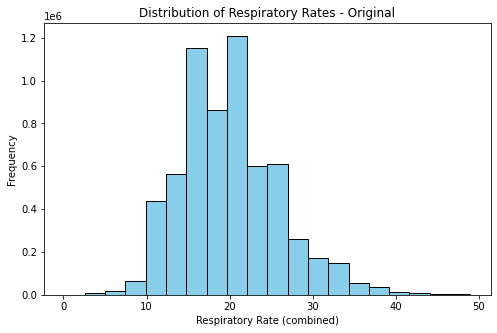

In [46]:
original_data = chartevents_rr_df['RespiratoryRate_combined'].dropna().tolist()
original_data = [value for value in original_data if 0 < value < 50]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Respiratory Rates - Original')
plt.xlabel('Respiratory Rate (combined)')
plt.ylabel('Frequency')
plt.show()

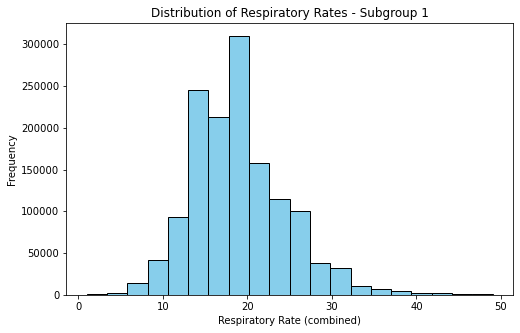

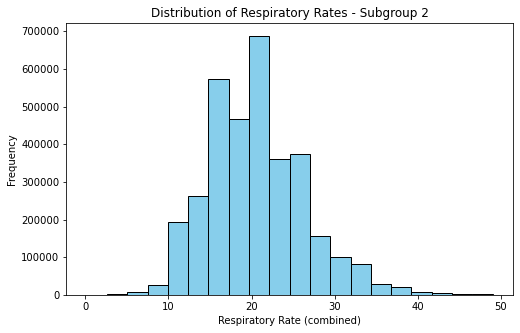

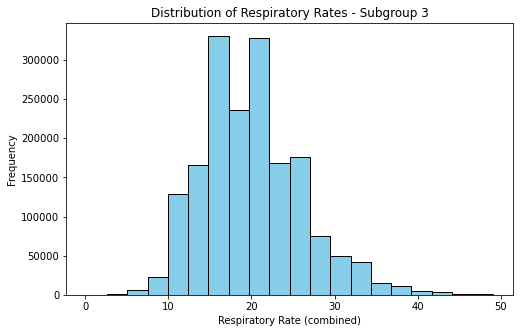

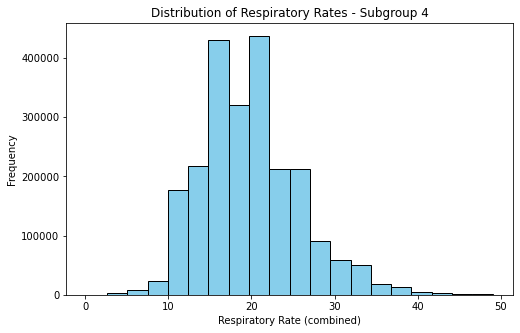

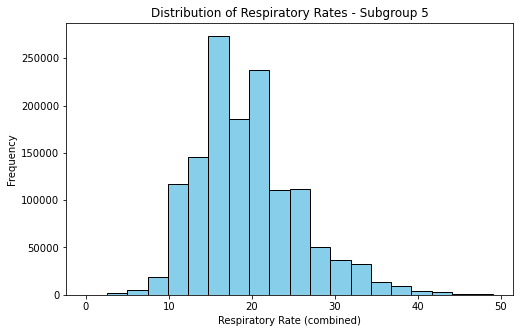

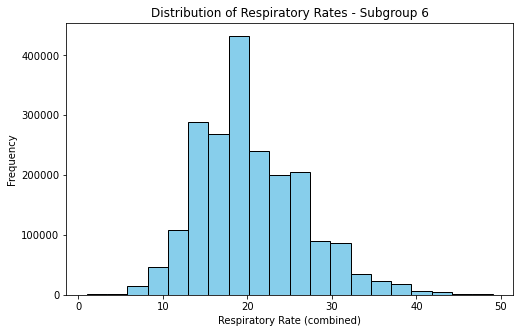

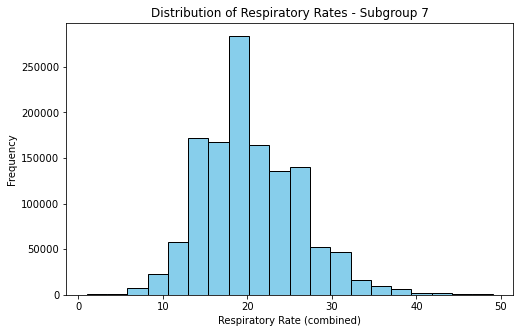

In [45]:
subgroups = [subgroup_1_rr_df, subgroup_2_rr_df, subgroup_3_rr_df,
             subgroup_4_rr_df, subgroup_5_rr_df, subgroup_6_rr_df, subgroup_7_rr_df]


for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['RespiratoryRate_combined'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value < 50]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Respiratory Rates - Subgroup {i + 1}')
    plt.xlabel('Respiratory Rate (combined)')
    plt.ylabel('Frequency')
    plt.show()


## Blood Pressure 

In [47]:
chartevents_bp_df = pd.read_csv('chartevents_bp.csv')

In [50]:
chartevents_bp_df['Combined_Blood_Pressure'].isna().sum()

0

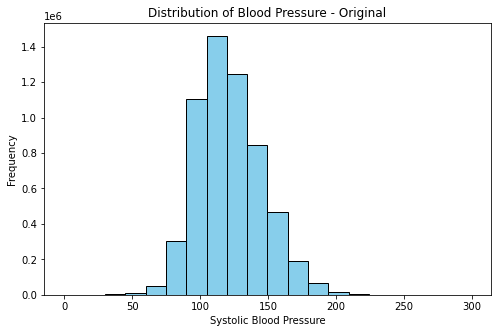

In [65]:
original_data = chartevents_bp_df['Combined_Blood_Pressure'].dropna().tolist()
original_data = [value for value in original_data if 0 < value < 300]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Blood Pressure - Original')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

In [60]:
def merge_blood_pressure_to_subgroup(bp_df, subgroup_df):
    bp_df['charttime'] = pd.to_datetime(bp_df['charttime'])

    # Drop the existing 'level_0' column if it exists
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    # Filter bp_df to include only rows where subject_id is in subgroup_df
    filtered_bp_df = bp_df[bp_df['subject_id'].isin(subgroup_df['subject_id'])]

    # Merge without including 'charttime'
    merged_df = pd.merge(filtered_bp_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Combined_Blood_Pressure']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='outer')
    return merged_df

In [61]:
subgroup_1_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_1_df)
subgroup_2_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_2_df)
subgroup_3_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_3_df)
subgroup_4_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_4_df)
subgroup_5_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_5_df)
subgroup_6_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_6_df)
subgroup_7_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_7_df)

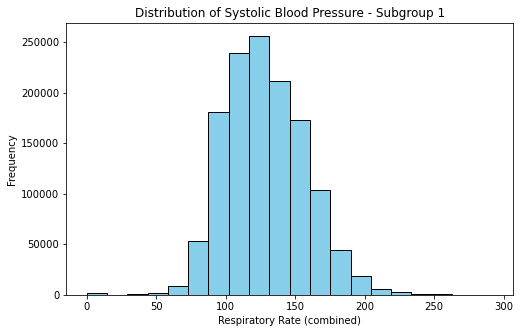

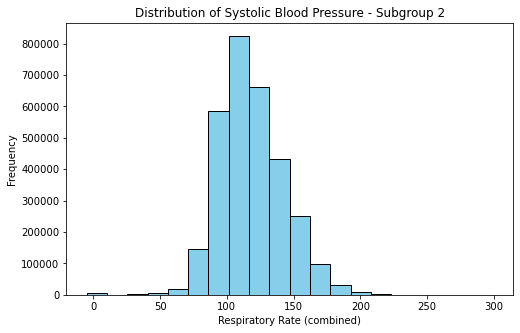

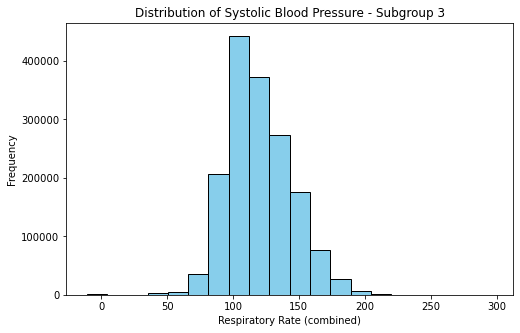

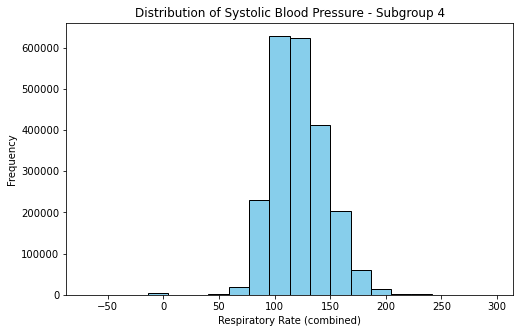

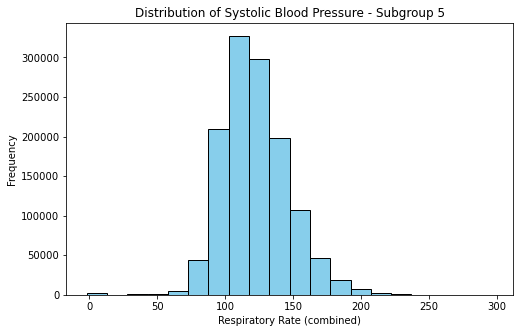

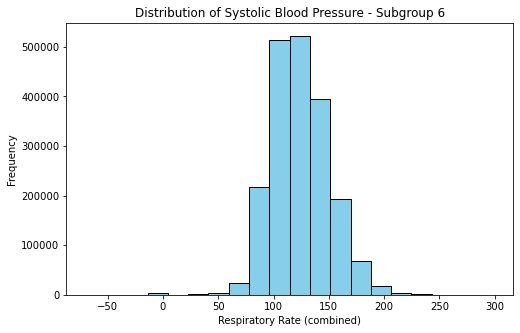

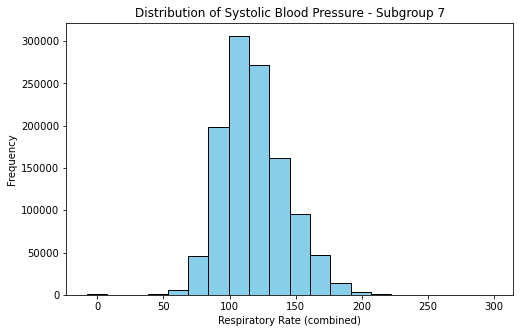

In [62]:
subgroups = [subgroup_1_bp_df, subgroup_2_bp_df, subgroup_3_bp_df,
             subgroup_4_bp_df, subgroup_5_bp_df, subgroup_6_bp_df, subgroup_7_bp_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['Combined_Blood_Pressure'].dropna().tolist()
    filtered_data = [value for value in filtered_data if value < 300]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Systolic Blood Pressure - Subgroup {i + 1}')
    plt.xlabel('Respiratory Rate (combined)')
    plt.ylabel('Frequency')
    plt.show()

## Heart Rate

In [70]:
chartevents_hr_df = pd.read_csv('chartevents_hr.csv')

In [86]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
580771,3235,175562,220995.0,2143-01-08 15:55:00,303.0,NaN,NaN
1521794,8533,152254,274086.0,2142-03-13 07:00:00,6632.0,NaN,NaN
4550793,25941,102600,270205.0,2191-06-11 00:37:00,900.0,NaN,NaN
5816304,45709,169409,287061.0,2144-12-03 07:07:00,941.0,NaN,NaN
5891204,47240,167812,274340.0,2153-08-10 07:00:00,5409.0,NaN,NaN
5934975,48220,108153,214944.0,2115-10-29 04:00:00,86101.0,NaN,NaN
6096669,51931,169190,289346.0,2186-05-25 06:55:00,770.0,NaN,NaN
6512670,60548,159650,232723.0,2109-11-13 17:06:00,880.0,NaN,NaN
6751591,67206,174522,210772.0,2129-09-21 11:38:00,459.0,NaN,NaN
7255785,80927,179544,252668.0,2155-06-08 01:00:00,11710.0,NaN,NaN


In [87]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10


In [88]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
1521794,8533,152254,274086.0,2142-03-13 07:00:00,663.2,NaN,NaN
5891204,47240,167812,274340.0,2153-08-10 07:00:00,540.9,NaN,NaN
5934975,48220,108153,214944.0,2115-10-29 04:00:00,8610.1,NaN,NaN
7255785,80927,179544,252668.0,2155-06-08 01:00:00,1171.0,NaN,NaN
7764956,92373,130520,256824.0,2194-08-14 16:45:00,999999.9,NaN,NaN


In [89]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [90]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
5934975,48220,108153,214944.0,2115-10-29 04:00:00,861.01,NaN,NaN
7764956,92373,130520,256824.0,2194-08-14 16:45:00,99999.99,NaN,NaN


In [91]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [92]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
7764956,92373,130520,256824.0,2194-08-14 16:45:00,9999.999,NaN,NaN


In [95]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [96]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High


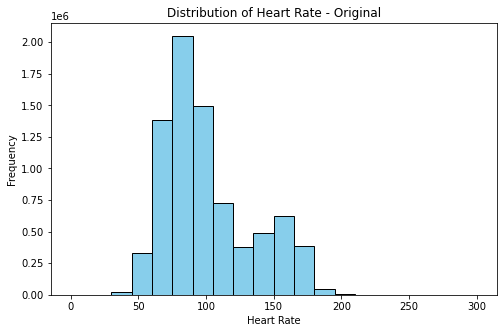

In [98]:
original_data = chartevents_hr_df['Heart Rate'].dropna().tolist()
original_data = [value for value in original_data if 0 < value]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Rate - Original')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [100]:
def merge_heart_rate_to_subgroup(hr_df, subgroup_df):
    hr_df['charttime'] = pd.to_datetime(hr_df['charttime'])

    # Drop the existing 'level_0' column if it exists
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    # Filter hr_df to include only rows where subject_id and hadm_id are in subgroup_df
    filtered_hr_df = hr_df[(hr_df['subject_id'].isin(subgroup_df['subject_id'])) & (hr_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    # Merge without including 'charttime'
    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_hr_df[['subject_id', 'hadm_id', 'icustay_id', 'Heart Rate', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df

In [101]:
subgroup_1_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_1_df)
subgroup_2_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_2_df)
subgroup_3_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_3_df)
subgroup_4_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_4_df)
subgroup_5_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_5_df)
subgroup_6_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_6_df)
subgroup_7_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_7_df)

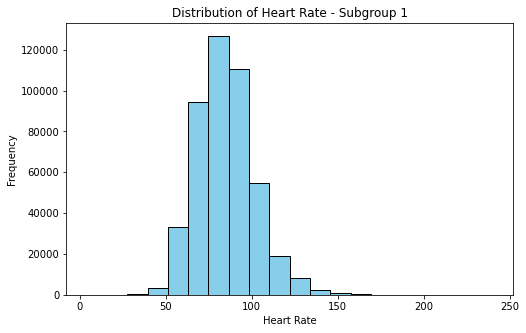

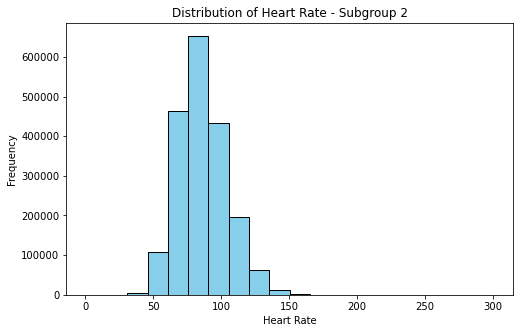

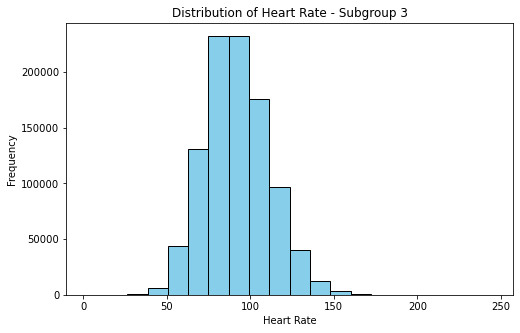

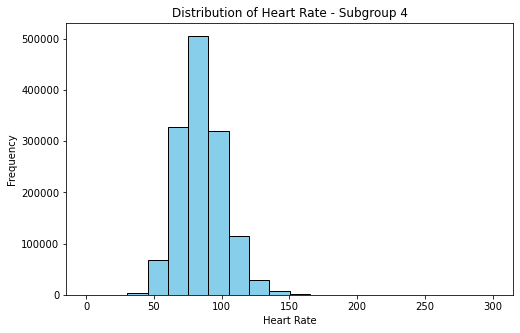

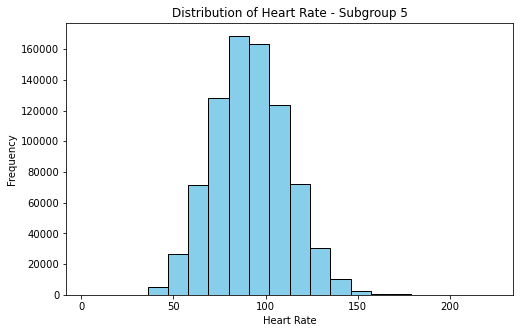

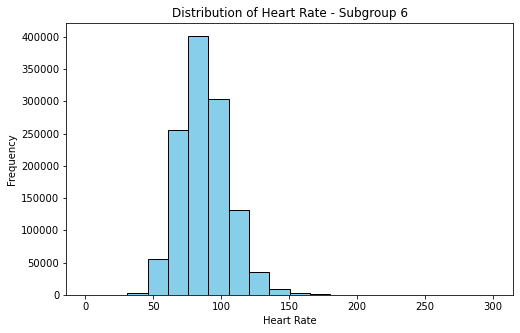

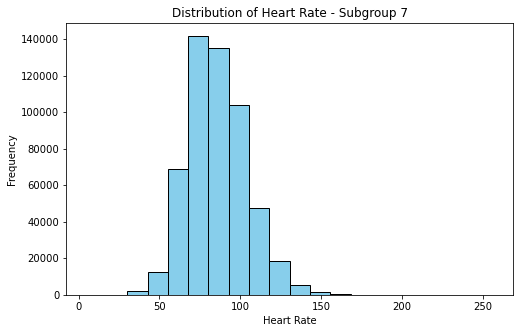

In [103]:
subgroups = [subgroup_1_hr_df, subgroup_2_hr_df, subgroup_3_hr_df,
             subgroup_4_hr_df, subgroup_5_hr_df, subgroup_6_hr_df, subgroup_7_hr_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['Heart Rate'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Heart Rate - Subgroup {i + 1}')
    plt.xlabel('Heart Rate')
    plt.ylabel('Frequency')
    plt.show()

## Oxygen Saturation

In [104]:
chartevents_o2sat_df = pd.read_csv('chartevents_o2sat.csv')

In [112]:
chartevents_o2sat_df[chartevents_o2sat_df['SpO2'] < 10]

,subject_id,hadm_id,icustay_id,charttime,SpO2
4122,68,108329,272667.0,2174-01-10 19:00:00,0.0
4123,68,108329,272667.0,2174-01-10 21:00:00,0.0
4128,68,108329,272667.0,2174-01-11 02:00:00,0.0
4845,91,121205,256972.0,2177-05-10 14:00:00,0.0
4846,91,121205,256972.0,2177-05-10 14:05:00,0.0
...,...,...,...,...,...
3375397,32443,184083,223654.0,2161-03-26 02:45:00,0.0
3379470,32488,137459,249558.0,2199-10-01 12:25:00,0.0
3389056,32611,141765,276974.0,2192-07-08 03:00:00,7.0
3392897,32658,182532,255383.0,2143-05-27 19:00:00,0.0


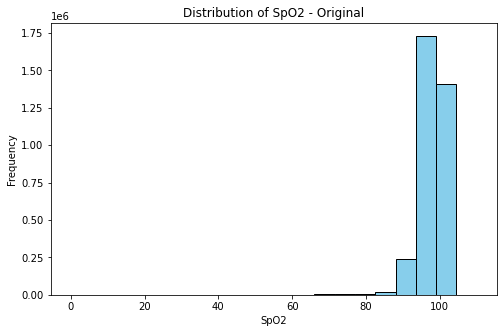

In [120]:
original_data = chartevents_o2sat_df['SpO2'].tolist()
# original_data = [value for value in original_data if 80 < value]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SpO2 - Original')
plt.xlabel('SpO2')
plt.ylabel('Frequency')
plt.show()

In [114]:
def merge_oxygen_saturation_to_subgroup(o2sat_df, subgroup_df):
    o2sat_df['charttime'] = pd.to_datetime(o2sat_df['charttime'])

    
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    filtered_o2sat_df = o2sat_df[(o2sat_df['subject_id'].isin(subgroup_df['subject_id'])) & (o2sat_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_o2sat_df[['subject_id', 'hadm_id', 'icustay_id', 'SpO2', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df


In [115]:
subgroup_1_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_1_df)
subgroup_2_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_2_df)
subgroup_3_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_3_df)
subgroup_4_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_4_df)
subgroup_5_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_5_df)
subgroup_6_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_6_df)
subgroup_7_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_7_df)

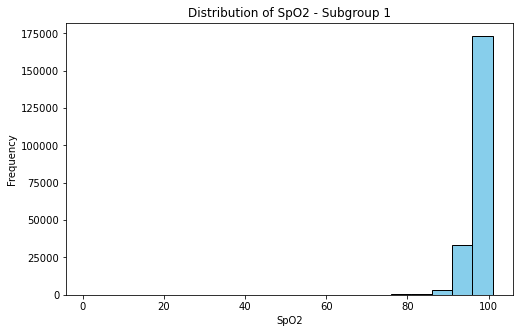

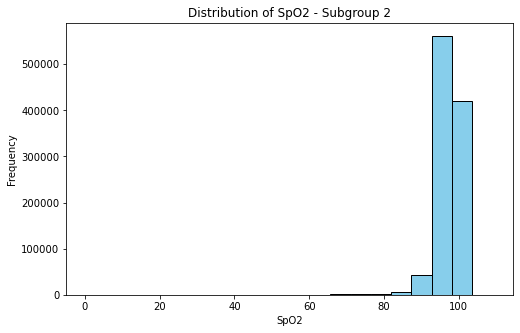

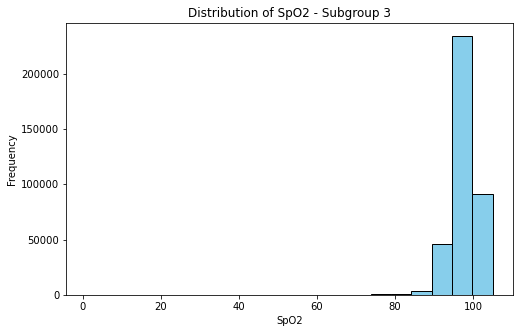

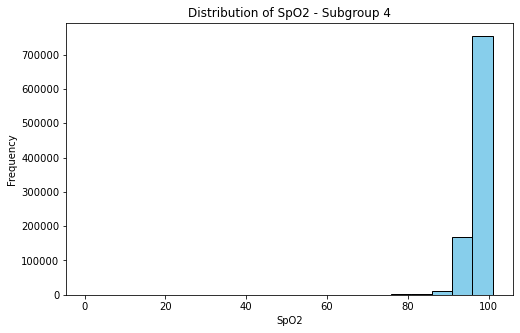

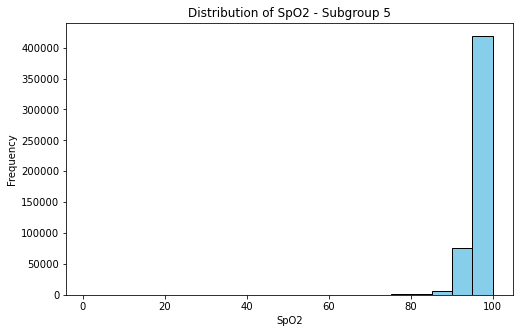

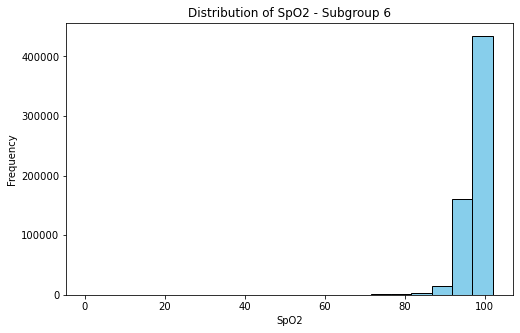

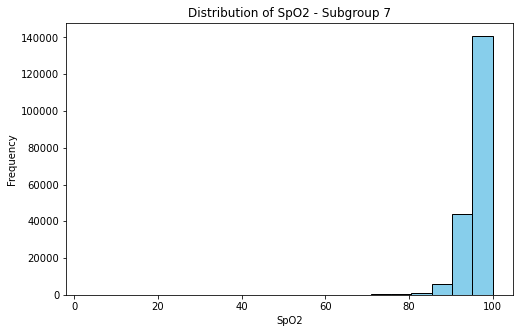

In [117]:
subgroups = [subgroup_1_o2sat_df, subgroup_2_o2sat_df, subgroup_3_o2sat_df,
             subgroup_4_o2sat_df, subgroup_5_o2sat_df, subgroup_6_o2sat_df, subgroup_7_o2sat_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['SpO2'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of SpO2 - Subgroup {i + 1}')
    plt.xlabel('SpO2')
    plt.ylabel('Frequency')
    plt.show()

## White Blood Cell Count

In [147]:
chartevents_wbc_df = pd.read_csv('chartevents_wbc.csv')

In [148]:
chartevents_wbc_df.WBC_combined.describe()

count    177293.000000
mean         12.633284
std          31.056027
min           0.000000
25%           8.100000
50%          11.100000
75%          15.100000
max       12500.000000
Name: WBC_combined, dtype: float64

In [135]:
chartevents_wbc_df[chartevents_wbc_df['WBC_combined'] > 100] 

,subject_id,hadm_id,icustay_id,charttime,WBC,"WBC (4-11,000)","WBC (4-11,000)",WBC_combined
2094,370,123421,228402.0,2153-03-04 04:45:00,NaN,206.3,206.3,206.3
2095,370,123421,228402.0,2153-03-04 21:00:00,NaN,222.8,222.8,222.8
2096,370,123421,228402.0,2153-03-05 05:00:00,NaN,180.4,180.4,180.4
24013,4145,130687,234089.0,2122-07-21 15:25:00,NaN,187.5,187.5,187.5
24014,4145,130687,234089.0,2122-07-21 20:10:00,NaN,140.8,140.8,140.8
...,...,...,...,...,...,...,...,...
163103,29641,109689,284954.0,2144-07-19 19:20:00,108.8,108.8,108.8,108.8
166891,30437,181115,277112.0,2180-02-17 16:21:00,12500.0,12500.0,12500.0,12500.0
167368,30547,134271,207886.0,2164-06-28 03:02:00,119.9,119.9,119.9,119.9
173495,32060,117616,294910.0,2107-04-02 03:12:00,104.7,104.7,104.7,104.7


In [149]:
chartevents_wbc_df['WBC_combined'] = chartevents_wbc_df['WBC_combined'].apply(lambda x: round(x, 2) if x <= 100 else round(x / 10**int(len(str(x))-2), 2))


In [150]:
chartevents_wbc_df['WBC_combined'].describe()

count    177293.000000
mean         12.411003
std           6.971541
min           0.000000
25%           8.100000
50%          11.100000
75%          15.100000
max          99.900000
Name: WBC_combined, dtype: float64

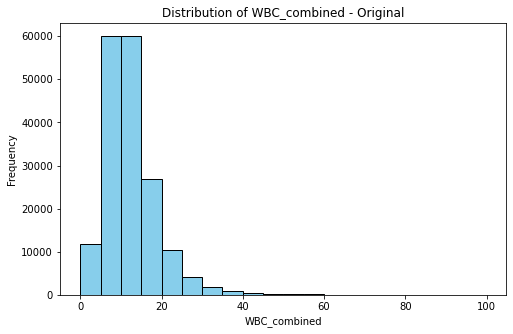

In [151]:
original_data = chartevents_wbc_df['WBC_combined'].tolist()
# original_data = [value for value in original_data if value > 100]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of WBC_combined - Original')
plt.xlabel('WBC_combined')
plt.ylabel('Frequency')
plt.show()

In [152]:
def merge_white_blood_cell_count_to_subgroup(wbc_df, subgroup_df):
    wbc_df['charttime'] = pd.to_datetime(wbc_df['charttime'])

    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)
        
    subgroup_df.reset_index(inplace=True)

    filtered_wbc_df = wbc_df[(wbc_df['subject_id'].isin(subgroup_df['subject_id'])) & (wbc_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_wbc_df[['subject_id', 'hadm_id', 'icustay_id', 'WBC_combined', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df


In [154]:
subgroup_1_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_1_df)
subgroup_2_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_2_df)
subgroup_3_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_3_df)
subgroup_4_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_4_df)
subgroup_5_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_5_df)
subgroup_6_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_6_df)
subgroup_7_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_7_df)

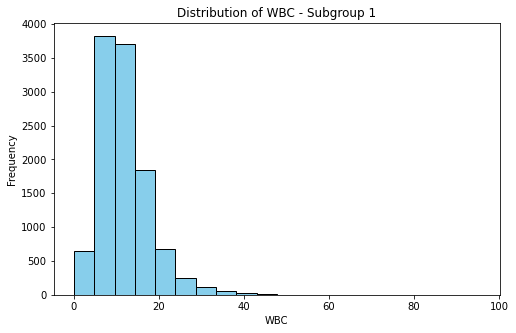

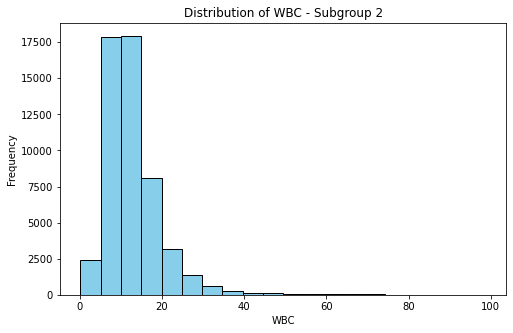

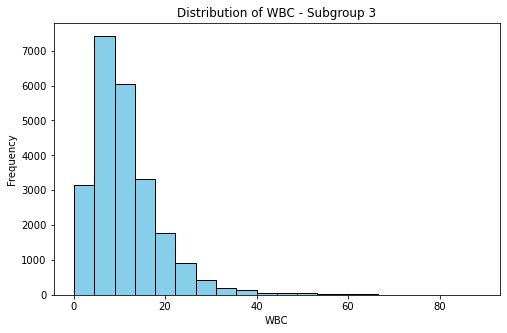

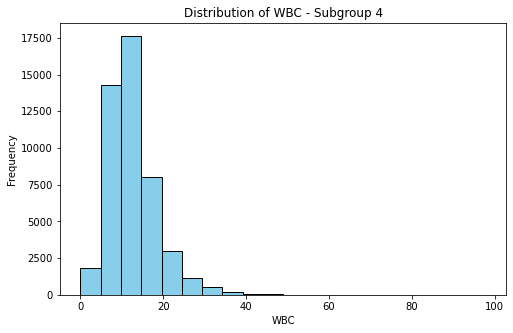

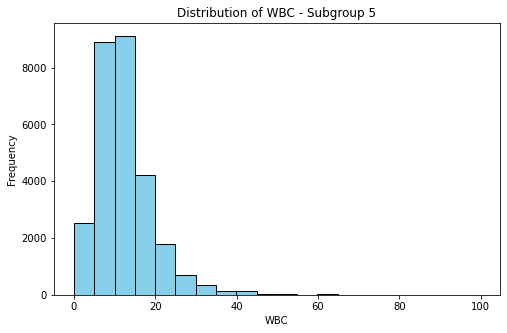

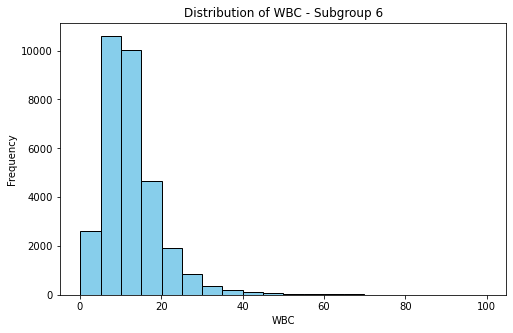

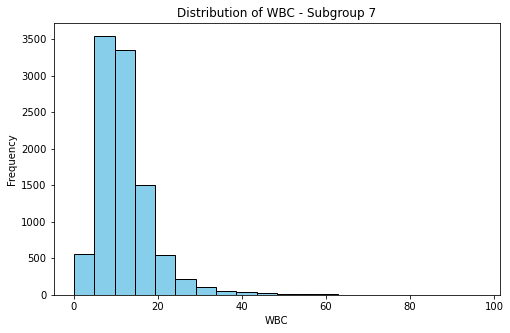

In [155]:
subgroups = [subgroup_1_wbc_df, subgroup_2_wbc_df, subgroup_3_wbc_df,
             subgroup_4_wbc_df, subgroup_5_wbc_df, subgroup_6_wbc_df, subgroup_7_wbc_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['WBC_combined'].dropna().tolist()
    #filtered_data = [value for value in filtered_data if 0 < value]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of WBC - Subgroup {i + 1}')
    plt.xlabel('WBC')
    plt.ylabel('Frequency')
    plt.show()